# Computational Lab to Solve Schrodinger Equation

# Task 1: Analytical Solution for the Infinite Square Well

## Problem Statement

Solve the non-dimensional Schrödinger equation (2) analytically for the infinite square well where:

- **Potential:** ν(x̃) = −1 for 0 < x̃ < 1
- **Boundary conditions:** ψ(0) = ψ(1) = 0 (infinite walls)

**Find:**
1. Expression for the non-dimensional energy eigenvalues in terms of γ²
2. Normalized wave functions (in non-dimensional units)

---

## Solution

# Task 1: Analytical Solution for the Infinite Square Well

## Given Information

- Non-dimensional Schrödinger equation: $\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon - \nu(\tilde{x}))\psi = 0$
- Potential: $\nu(\tilde{x}) = -1$ for $0 < \tilde{x} < 1$
- Boundary conditions: $\psi(0) = 0$ and $\psi(1) = 0$ (infinite walls)

---

## Derivation

### Step 1: Substitute the potential

With $\nu(\tilde{x}) = -1$, the equation becomes:

$$\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon - (-1))\psi = 0$$

$$\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon + 1)\psi = 0$$

### Step 2: Define $k^2 = \gamma^2(\epsilon + 1)$

The equation simplifies to:

$$\frac{d^2\psi}{d\tilde{x}^2} + k^2\psi = 0$$

This is a simple harmonic oscillator equation with general solution:

$$\psi(\tilde{x}) = A \sin(k\tilde{x}) + B \cos(k\tilde{x})$$

### Step 3: Apply boundary conditions

**Left boundary ($\tilde{x} = 0$):**

$$\psi(0) = A \sin(0) + B \cos(0) = B = 0$$

So $B = 0$, giving us: $\psi(\tilde{x}) = A \sin(k\tilde{x})$

**Right boundary ($\tilde{x} = 1$):**

$$\psi(1) = A \sin(k) = 0$$

For non-trivial solutions ($A \neq 0$), we need: $\sin(k) = 0$

This gives us: **$k = n\pi$**, where $n = 1, 2, 3, \ldots$

### Step 4: Find energy eigenvalues

From $k^2 = \gamma^2(\epsilon + 1)$ and $k = n\pi$:

$$(n\pi)^2 = \gamma^2(\epsilon + 1)$$

$$n^2\pi^2 = \gamma^2(\epsilon + 1)$$

$$\epsilon + 1 = \frac{n^2\pi^2}{\gamma^2}$$

$$\boxed{\epsilon_n = \frac{n^2\pi^2}{\gamma^2} - 1, \quad n = 1, 2, 3, \ldots}$$

### Step 5: Normalize the wave functions

The unnormalized wave function is: $\psi_n(\tilde{x}) = A \sin(n\pi\tilde{x})$

Normalization condition:

$$\int_0^1 |\psi_n(\tilde{x})|^2 d\tilde{x} = 1$$

$$\int_0^1 A^2 \sin^2(n\pi\tilde{x}) d\tilde{x} = 1$$

Using the integral: $\int_0^1 \sin^2(n\pi\tilde{x}) d\tilde{x} = \frac{1}{2}$

$$A^2 \cdot \frac{1}{2} = 1$$

$$A^2 = 2$$

$$A = \sqrt{2}$$

$$\boxed{\psi_n(\tilde{x}) = \sqrt{2} \sin(n\pi\tilde{x}), \quad n = 1, 2, 3, \ldots}$$

---

## Final Results

### Energy Eigenvalues

$$\epsilon_n = \frac{n^2\pi^2}{\gamma^2} - 1, \quad n = 1, 2, 3, \ldots$$

### Normalized Wave Functions

$$\psi_n(\tilde{x}) = \sqrt{2} \sin(n\pi\tilde{x}), \quad 0 \leq \tilde{x} \leq 1$$

### First Few States

| $n$ | Energy $\epsilon_n$ | Wave Function |
|-----|---------------------|---------------|
| 1 | $\frac{\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(\pi\tilde{x})$ |
| 2 | $\frac{4\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(2\pi\tilde{x})$ |
| 3 | $\frac{9\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(3\pi\tilde{x})$ |

---



# Task 2: Numerical Solution for the Wave Function

## Objective

Find the wave function $\psi$ numerically in the infinite square well for a given non-dimensional trial energy $\epsilon$. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
# Constants
N = 1000  # Number of grid points
gamma_squared = 200  # γ²
l = 1.0 / (N - 1)  # Step size
x = np.linspace(0, 1, N)  # Discretized x values

In [3]:
# Potential: Infinite square well
potential = np.full(N, -1.0)  # ν(x) = -1 for 0 < x < 1

In [4]:
# Function to compute k²
def compute_k_squared(energy, potential, gamma_squared):
    return gamma_squared * (energy - potential)

In [5]:
psi = np.zeros(N)
psi[1] = 1e-4  # Arbitrary small value for initial slope


In [6]:
# Function to solve Schrödinger equation numerically
def solve_schrodinger(energy, potential, gamma_squared, N, l):
    k_squared = compute_k_squared(energy, potential, gamma_squared)
    # Iteratively compute psi using the finite difference method
    for n in range(1, N - 1):
        psi[n + 1] = (
            2 * (1 - (5 / 12) * l**2 * k_squared[n]) * psi[n]
            - (1 + (1 / 12) * l**2 * k_squared[n - 1]) * psi[n - 1]
        ) / (1 + (1 / 12) * l**2 * k_squared[n + 1])

    return psi

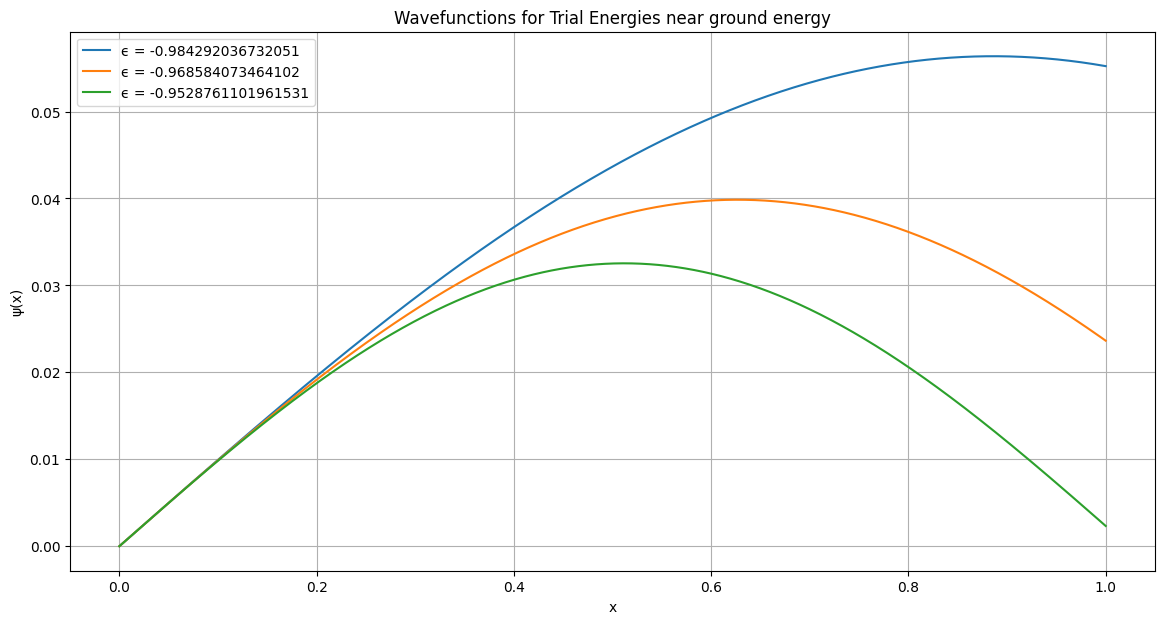

In [7]:


# Trial energies
trial_energies = [(np.pi * n / gamma_squared) - 1 for n in range(1, 4)]

# Solve and plot wavefunctions for trial energies
plt.figure(figsize=(14, 7))
for energy in trial_energies:
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    plt.plot(x, psi, label=f"ϵ = {energy}")

plt.title("Wavefunctions for Trial Energies near ground energy")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Wavefunctions_for_Trial_Energies_near_ground_energy.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Task 3

Next we will implement the numerical method to find the energies and
eigenstates of the infinite square well (for γ2 = 200 as before). While
the ψ you computed in task 2 satisfies the Schr¨odinger equation, it only
satisfies the boundary conditions for certain values of the energy ϵ. To
find them, you should implement the following algorithm to find the value
of ϵ which solves ψ[N−1] = 0. This is a form of the bisection algorithm
for finding roots of a function. Before you code it, try to sketch out how
it works using a pencil and paper.
Start with a trial energy ϵ below the eigenstate, and define an increment
∆ϵ. ∆ϵ should start at some value smaller than the difference between
adjacent energy eigenvalues, but don’t make it too small. Compute the
wavefunction ψ for energy ϵ. Then add ∆ϵ to this energy and compute
the wavefunction again. Test if the sign of ψ[N−1] is different in those
two cases, and if it is, update the energy increment ∆ϵ =−∆ϵ/2. Keep
doing this in a while loop, where the variable ϵ updates each time, until
|∆ϵ|< acc, where acc is a variable that defines the accuracy with which
the root is sought.

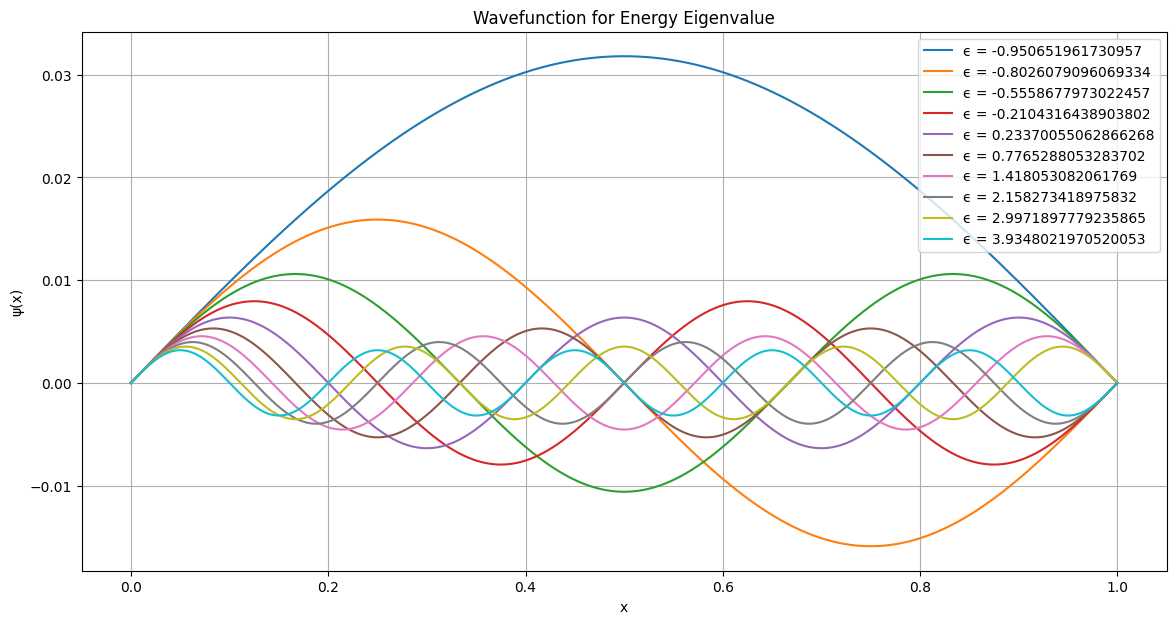

In [8]:
acc = 1e-8 # Desired accuracy for energy eigenvalues

# Solve and plot wavefunctions for the eigenvalue
plt.figure(figsize=(14, 7))

eps_0 = -0.999999

eps_arr = []

energy  = eps_0



while len(eps_arr) < 10:
    del_eps = 0.02
    psi_old = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]
    energy += del_eps
    while abs(del_eps)>acc:
        energy += del_eps
        psi_new = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]

        if psi_new * psi_old < 0:
            del_eps = -del_eps/2

        psi_old = psi_new

    
    
    eps_arr.append(energy)


# Plot the wavefunction
for energy in eps_arr:
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    plt.plot(x, psi, label=f"ϵ = {energy}")
plt.title("Wavefunction for Energy Eigenvalue")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Wavefunction_for_Energy_Eigenvalue.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Task 4
Use this method to compute the first 10 energy eigenvalues and compare
with the analytic solution from task 1.

| $n$ | Energy $\epsilon_n$ | Wave Function |
|-----|---------------------|---------------|
| 1 | $\frac{\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(\pi\tilde{x})$ |
| 2 | $\frac{4\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(2\pi\tilde{x})$ |
| 3 | $\frac{9\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(3\pi\tilde{x})$ |

In [9]:
Analytical_epsilons = [(np.pi)**2 * n**2 / gamma_squared - 1 for n in range(1, 11)]

print("Computed energy eigenvalues:")
for i, energy in enumerate(eps_arr):
    print(f"n={i+1}: Computed ϵ = {energy}, Theoretical ϵ = {Analytical_epsilons[i]}, Error = {abs(energy - Analytical_epsilons[i])}")

Computed energy eigenvalues:
n=1: Computed ϵ = -0.950651961730957, Theoretical ϵ = -0.9506519779945533, Error = 1.626359624751217e-08
n=2: Computed ϵ = -0.8026079096069334, Theoretical ϵ = -0.8026079119782128, Error = 2.3712793950636524e-09
n=3: Computed ϵ = -0.5558677973022457, Theoretical ϵ = -0.5558678019509788, Error = 4.648733176182418e-09
n=4: Computed ϵ = -0.2104316438903802, Theoretical ϵ = -0.2104316479128514, Error = 4.0224712172243215e-09
n=5: Computed ϵ = 0.23370055062866268, Theoretical ϵ = 0.23370055013616975, Error = 4.924929353222751e-10
n=6: Computed ϵ = 0.7765288053283702, Theoretical ϵ = 0.7765287921960846, Error = 1.3132285592298842e-08
n=7: Computed ϵ = 1.418053082061769, Theoretical ϵ = 1.4180530782668925, Error = 3.79487641311016e-09
n=8: Computed ϵ = 2.158273418975832, Theoretical ϵ = 2.1582734083485944, Error = 1.0627237756466457e-08
n=9: Computed ϵ = 2.9971897779235865, Theoretical ϵ = 2.99718978244119, Error = 4.517603624520916e-09
n=10: Computed ϵ = 3.934802

### Task 5

You should now investigate the accuracy of the energy eigenvalues. How
accurate are they? Do they get more and more accurate as the variable
acc is made smaller? Explore this as you would in an experiment, and if
you find that they do not, consider why that might be.

In [10]:
acc = 1e-8 # Desired accuracy for energy eigenvalues
eps_0 = -0.999999

def find_energy_eigenvalues(eps_0, potential, gamma_squared, N, l, acc, del_eps):
    eps_arr = []
    energy  = eps_0

    while len(eps_arr) < 10:
        del_eps = 0.02
        psi_old = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]
        energy += del_eps
        while abs(del_eps)>acc:
            energy += del_eps
            psi_new = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]

            if psi_new * psi_old < 0:
                del_eps = -del_eps/2

            psi_old = psi_new

        
        
        eps_arr.append(energy)

    return eps_arr

In [11]:
eps_arr = find_energy_eigenvalues(eps_0, potential, gamma_squared, N, l, acc, del_eps)
for i, energy in enumerate(eps_arr):
    print(f"n={i+1}: Computed ϵ = {energy}, Theoretical ϵ = {Analytical_epsilons[i]}, Error = {abs(energy - Analytical_epsilons[i])}")

n=1: Computed ϵ = -0.950651961730957, Theoretical ϵ = -0.9506519779945533, Error = 1.626359624751217e-08
n=2: Computed ϵ = -0.8026079096069334, Theoretical ϵ = -0.8026079119782128, Error = 2.3712793950636524e-09
n=3: Computed ϵ = -0.5558677973022457, Theoretical ϵ = -0.5558678019509788, Error = 4.648733176182418e-09
n=4: Computed ϵ = -0.2104316438903802, Theoretical ϵ = -0.2104316479128514, Error = 4.0224712172243215e-09
n=5: Computed ϵ = 0.23370055062866268, Theoretical ϵ = 0.23370055013616975, Error = 4.924929353222751e-10
n=6: Computed ϵ = 0.7765288053283702, Theoretical ϵ = 0.7765287921960846, Error = 1.3132285592298842e-08
n=7: Computed ϵ = 1.418053082061769, Theoretical ϵ = 1.4180530782668925, Error = 3.79487641311016e-09
n=8: Computed ϵ = 2.158273418975832, Theoretical ϵ = 2.1582734083485944, Error = 1.0627237756466457e-08
n=9: Computed ϵ = 2.9971897779235865, Theoretical ϵ = 2.99718978244119, Error = 4.517603624520916e-09
n=10: Computed ϵ = 3.9348021970520053, Theoretical ϵ = 3

In [12]:
Analytical_epsilons = np.array([(np.pi)**2 * n**2 / gamma_squared - 1 for n in range(1, 11)])

Look at smallest energy state for least inaccuracy due ot runge kuttte. For N=1000, so the $O(l^4)$ is an error of $1^{-12}$. Hence we should expect to see no real significant changes in the error after reducing the acc variable to below $10^{-12}$

In [13]:

def error_analysis_with_accuracy_tol(acc):
    computed_epsilons = np.array(find_energy_eigenvalues(eps_0, potential, gamma_squared, N, l, acc, del_eps=0.02))
    error_in_eigenvalues = np.abs(computed_epsilons[0] - Analytical_epsilons[0])
    return error_in_eigenvalues


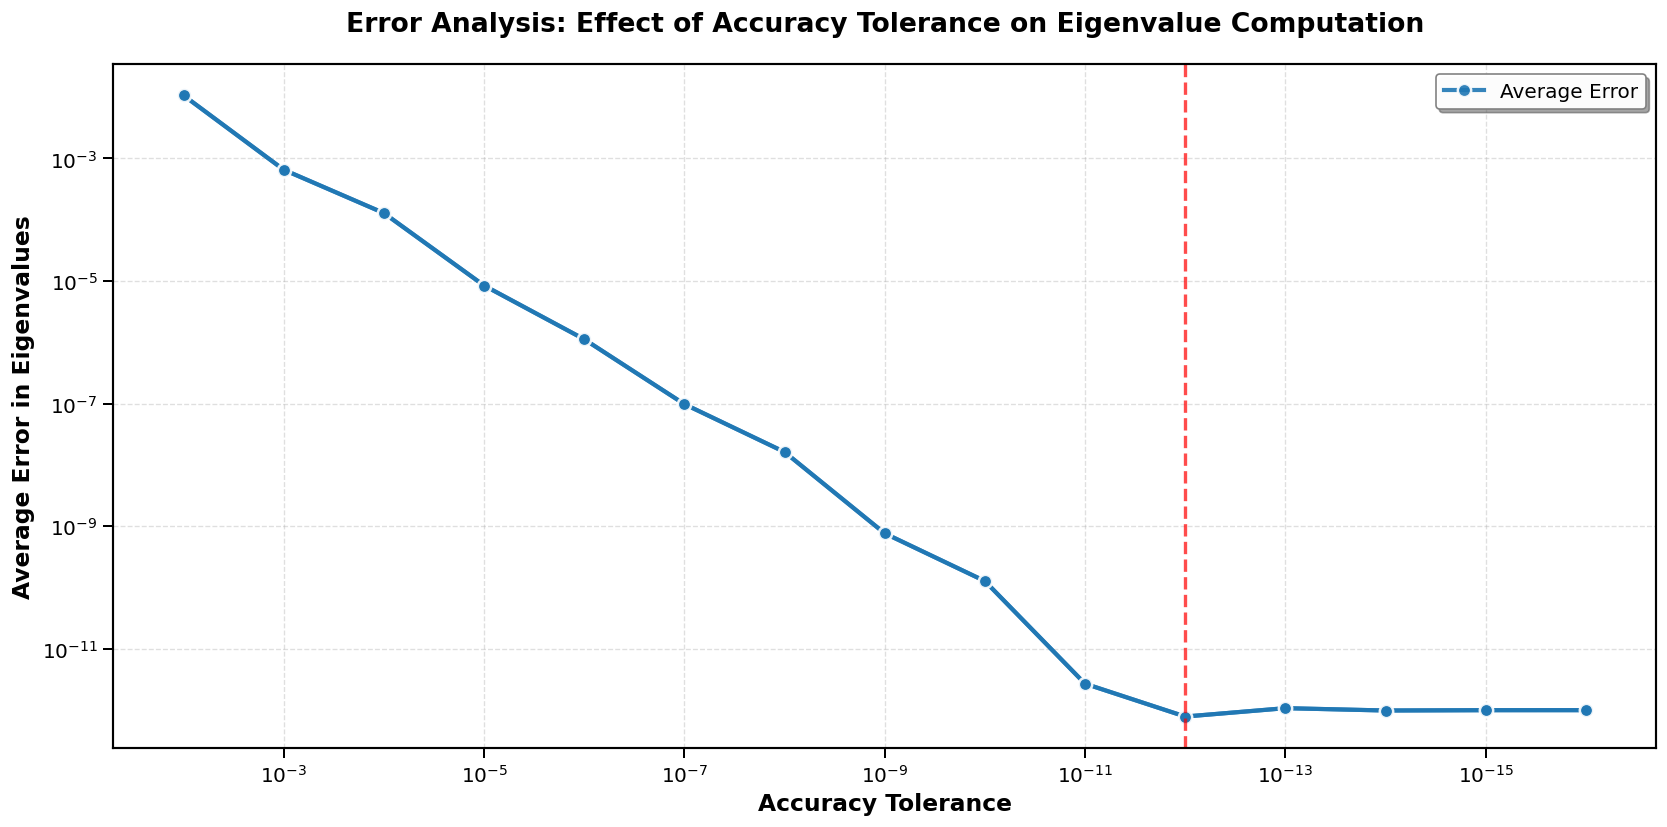

In [14]:
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

acc_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16]
avg_errors = []

for acc in acc_values:
    error_in_eigenvalues = error_analysis_with_accuracy_tol(acc)
    avg_errors.append(error_in_eigenvalues)

# Plot with better styling
ax.loglog(acc_values, avg_errors, 
          'o-', color='#1f77b4', linewidth=2.5, markersize=8,
          markeredgewidth=1.5, markeredgecolor='white', alpha=0.9,
          label='Average Error')

# Title and labels
ax.set_title("Error Analysis: Effect of Accuracy Tolerance on Eigenvalue Computation", 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Accuracy Tolerance", fontsize=14, fontweight='bold')
ax.set_ylabel("Average Error in Eigenvalues", fontsize=14, fontweight='bold')

# Grid styling
ax.grid(True, which='major', linestyle='--', alpha=0.4, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)

# Invert x-axis (smaller tolerance = better, so it reads left to right as improvement)
ax.invert_xaxis()

# Legend
ax.legend(fontsize=12, framealpha=0.98, loc='best', 
          edgecolor='gray', fancybox=True, shadow=True)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)
ax.tick_params(axis='both', which='minor', width=0.8, length=4)

# Spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.3)
    
# Plot with better styling
ax.loglog(acc_values, avg_errors, 
          'o-', color='#1f77b4', linewidth=2.5, markersize=8,
          markeredgewidth=1.5, markeredgecolor='white', alpha=0.9,
          label='Average Error')

# Add vertical line at 1e-12
ax.axvline(x=1e-12, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Machine Precision Limit')
plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Error_Analysis_with_varying_accuracy_tolerance.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [15]:
N = np.array([100, 200, 300, 400, 500, 600, 700, 1000, 1250, 1500, 1750, 2000])
acc = 1e-8 
copmuted_epsilons_list = []
analytical_epsilon = Analytical_epsilons[0]

In [16]:
def error_analysis_with_N(N):
    for n in N:
        computed_epsilons = find_energy_eigenvalues(eps_0, potential, gamma_squared, n, l, acc, del_eps=0.02)
        copmuted_epsilons_list.append(computed_epsilons[0])
    return copmuted_epsilons_list

### Part 6

In [17]:
print(np.shape(psi))

(1000,)


Using energy eigenvalue for n=1: ϵ = -0.950651961730957
Integral of |psi|^2 (before normalization): 0.0005055946297086093
Integral of |psi|^2 (after normalization): 1.000000


/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/1690355191.py:15: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(psi**2, dx=l)
/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/1690355191.py:26: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_normalized = simps(psi_normalized**2, dx=l)


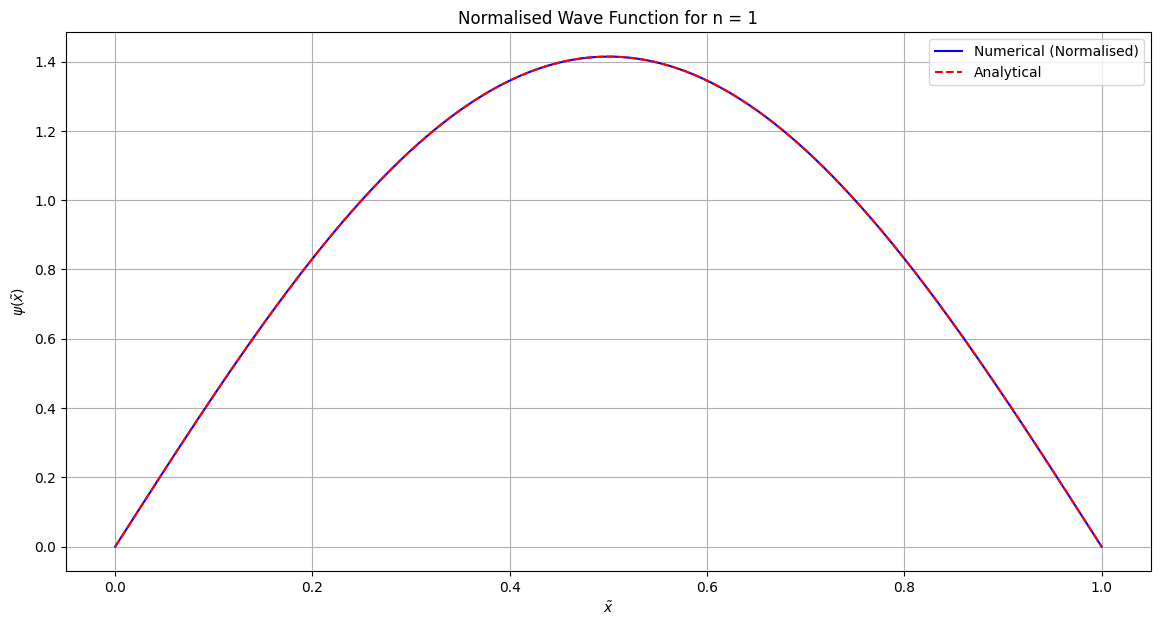

In [18]:
from scipy.integrate import simps

# Step size
N=1000
l = 1.0 / (N - 1)
n = 1  # First energy level

energy = eps_arr[n - 1]  # Energy eigenvalue for n=1
print(f"Using energy eigenvalue for n={n}: ϵ = {energy}")

psi = solve_schrodinger(energy, potential, gamma_squared, N, l)


# Compute the integral of |psi|^2
integral = simps(psi**2, dx=l)

# Normalization constant
normalization_constant = 1.0 / np.sqrt(integral)

print(f"Integral of |psi|^2 (before normalization): {integral}")

# Normalize psi
psi_normalized = normalization_constant * psi

# Verify normalization
integral_normalized = simps(psi_normalized**2, dx=l)
print(f"Integral of |psi|^2 (after normalization): {integral_normalized:.6f}")

# Analytical solution
psi_analytical = np.sqrt(2) * np.sin(n * np.pi * x)

# Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(x, psi_normalized, label="Numerical (Normalised)", linestyle="-", color="blue")
plt.plot(x, psi_analytical, label="Analytical", linestyle="--", color="red")
plt.title(f"Normalised Wave Function for n = {n}")
plt.xlabel("$\\tilde{x}$")
plt.ylabel("$\\psi(\\tilde{x})$")
plt.legend()
plt.grid()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Normalized_Wave_Function_for_n.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

Computing for n = 1, energy = -0.950651961730957
Computing for n = 2, energy = -0.8026079096069334
Computing for n = 3, energy = -0.5558677973022457
Computing for n = 4, energy = -0.2104316438903802
Computing for n = 5, energy = 0.23370055062866268
Computing for n = 6, energy = 0.7765288053283702


/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/2378981772.py:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(psi**2, dx=l)


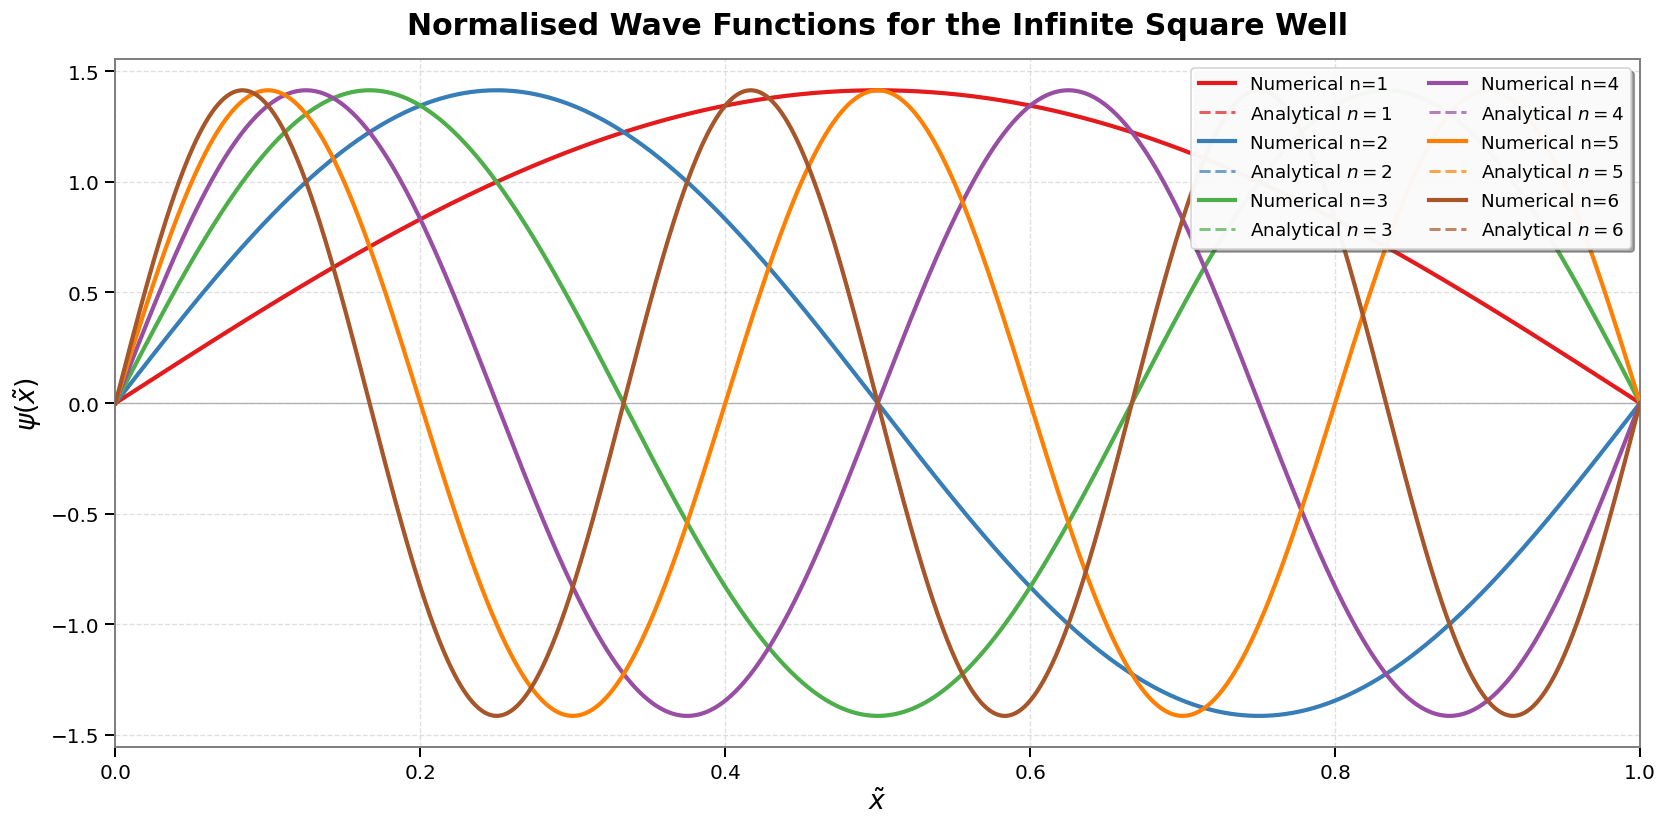

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Define parameters
N = 1000
l = 1.0 / (N - 1)
x = np.linspace(0, 1, N)

# Your computed energy eigenvalues
energy_values = eps_arr[:6]  # Replace with your actual list of eigenvalues

# Define the potential
def V(x):
    return -1

potential = np.array([V(xi) for xi in x])

# Define a color palette for each energy level
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628', '#f781bf']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

for n, energy in enumerate(energy_values, start=1):
    print(f"Computing for n = {n}, energy = {energy}")
    
    # Solve the Schrödinger equation
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    
    # Normalize the wave function
    integral = simps(psi**2, dx=l)
    normalization_constant = 1.0 / np.sqrt(integral)
    psi_normalized = normalization_constant * psi
    
    # Ensure correct sign
    if psi_normalized[1] < 0:
        psi_normalized = -psi_normalized
    
    # Analytical solution
    psi_analytical = np.sqrt(2) * np.sin(n * np.pi * x)
    
    # Plot numerical solution (solid line)
    ax.plot(x, psi_normalized, 
            color=colors[(n-1) % len(colors)], 
            linewidth=2.5, 
            label=f"Numerical n={n}",
            zorder=3)
    
    # Plot analytical solution (dashed line, same color)
    ax.plot(x, psi_analytical, 
            color=colors[(n-1) % len(colors)], 
            linestyle="--", 
            linewidth=1.8, 
            alpha=0.7,
            label=f"Analytical $n={n}$",
            zorder=2)

# Title and labels
ax.set_title("Normalised Wave Functions for the Infinite Square Well", 
             fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel(r"$\tilde{x}$", fontsize=16, fontweight='bold')
ax.set_ylabel(r"$\psi(\tilde{x})$", fontsize=16, fontweight='bold')

# Axis limits
ax.set_xlim(0, 1)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)

# Add horizontal line at y=0
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3, zorder=1)

# Grid
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.8, zorder=0)

# Legend
ax.legend(loc='upper right', 
          fontsize=11, 
          framealpha=0.95,
          edgecolor='lightgray',
          fancybox=True,
          shadow=True,
          ncol=2)

# Spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('gray')

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Normalized_Wave_Functions_for_the_Infinite_Square_Well.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/273237502.py:12: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(psi**2, dx=l)


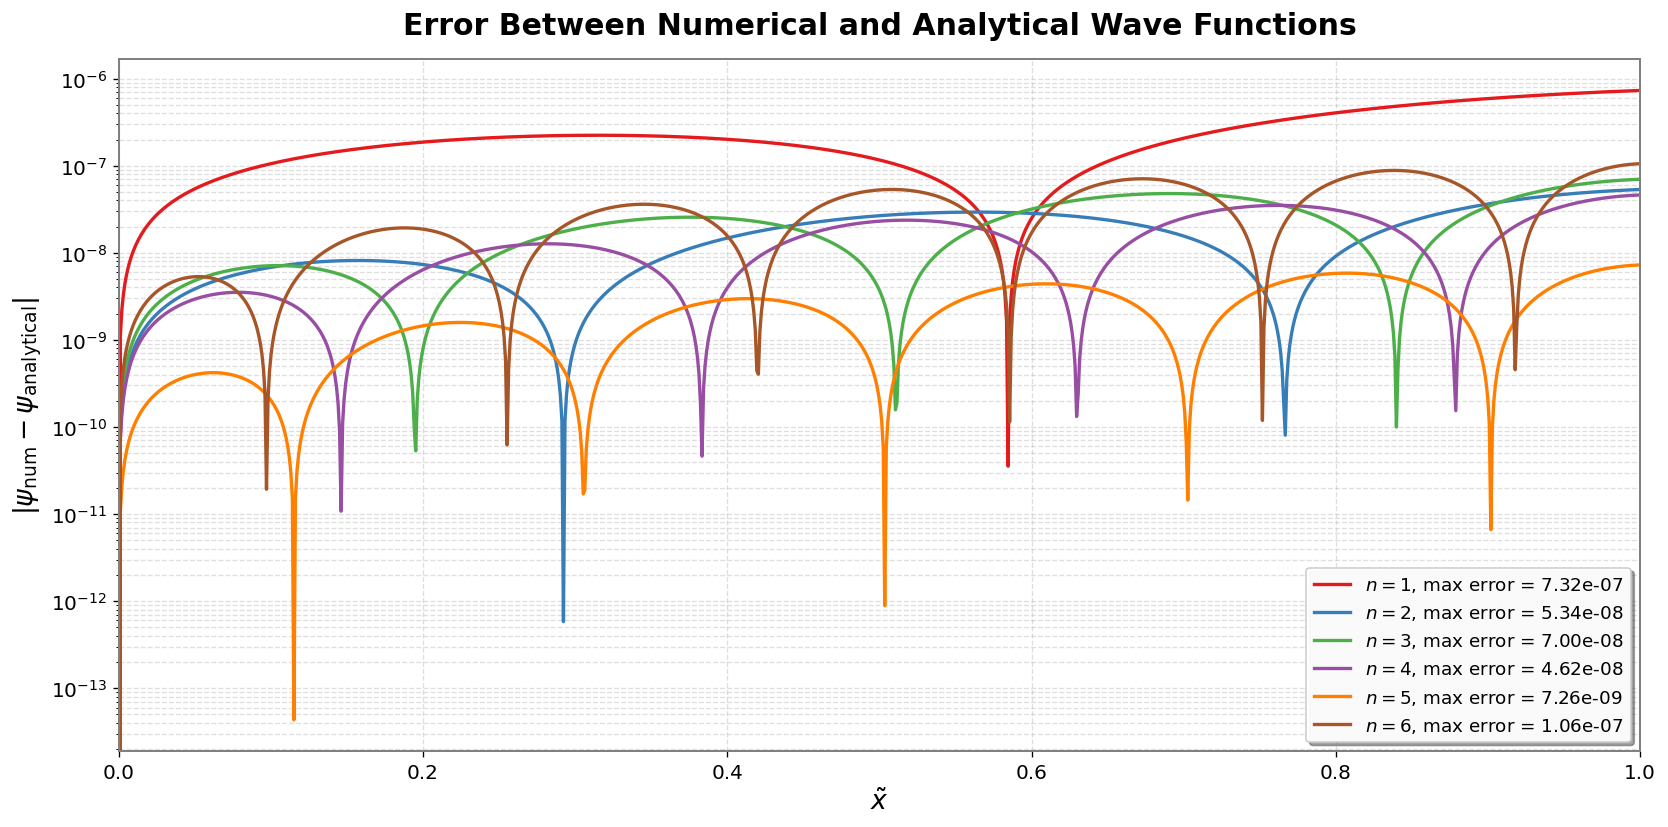

In [20]:
# Create figure for error plot
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

# Define colors
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628', '#f781bf']

for n, energy in enumerate(energy_values, start=1):
    # Solve the Schrödinger equation
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    
    # Normalize the wave function
    integral = simps(psi**2, dx=l)
    normalization_constant = 1.0 / np.sqrt(integral)
    psi_normalized = normalization_constant * psi
    
    # Ensure correct sign
    if psi_normalized[1] < 0:
        psi_normalized = -psi_normalized
    
    # Analytical solution
    psi_analytical = np.sqrt(2) * np.sin(n * np.pi * x)
    
    # Calculate error
    error = np.abs(psi_normalized - psi_analytical)
    
    # Plot error
    ax.plot(x, error, 
            color=colors[(n-1) % len(colors)], 
            linewidth=2, 
            label=f"$n={n}$, max error = {np.max(error):.2e}")

# Title and labels
ax.set_title("Error Between Numerical and Analytical Wave Functions", 
             fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel(r"$\tilde{x}$", fontsize=16, fontweight='bold')
ax.set_ylabel(r"$|\psi_{\mathrm{num}} - \psi_{\mathrm{analytical}}|$", fontsize=16, fontweight='bold')

# Axis settings
ax.set_xlim(0, 1)
ax.set_yscale('log')  # Log scale to see small errors better
ax.tick_params(axis='both', which='major', labelsize=12)

# Grid
ax.grid(True, linestyle='--', alpha=0.4, which='both')

# Legend
ax.legend(loc='lower right', fontsize=11, framealpha=0.95, fancybox=True, shadow=True)

# Spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('gray')

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Error_Between_Numerical_and_Analytical_Wave_Functions.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

Computing uncertainty for n = 1
  Δx̃ = 0.180756, Δp̃ = 3.141592, Δx̃Δp̃ = 0.567862
Computing uncertainty for n = 2
  Δx̃ = 0.265835, Δp̃ = 6.283175, Δx̃Δp̃ = 1.670287
Computing uncertainty for n = 3
  Δx̃ = 0.278755, Δp̃ = 9.424743, Δx̃Δp̃ = 2.627195
Computing uncertainty for n = 4
  Δx̃ = 0.283138, Δp̃ = 12.566288, Δx̃Δp̃ = 3.557992
Computing uncertainty for n = 5
  Δx̃ = 0.285144, Δp̃ = 15.707801, Δx̃Δp̃ = 4.478980
Computing uncertainty for n = 6
  Δx̃ = 0.286227, Δp̃ = 18.849276, Δx̃Δp̃ = 5.395178
Computing uncertainty for n = 7
  Δx̃ = 0.286879, Δp̃ = 21.990705, Δx̃Δp̃ = 6.308667
Computing uncertainty for n = 8
  Δx̃ = 0.287301, Δp̃ = 25.132079, Δx̃Δp̃ = 7.220467
Computing uncertainty for n = 9
  Δx̃ = 0.287590, Δp̃ = 28.273390, Δx̃Δp̃ = 8.131139
Computing uncertainty for n = 10
  Δx̃ = 0.287796, Δp̃ = 31.414632, Δx̃Δp̃ = 9.041016


/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/228547734.py:31: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(psi**2, dx=l)
/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/228547734.py:41: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  x_expectation = simps(x * psi_normalized**2, dx=l)
/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/228547734.py:42: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  x_squared_expectation = simps(x**2 * psi_normalized**2, dx=l)
/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/228547734.py:56: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in Sci

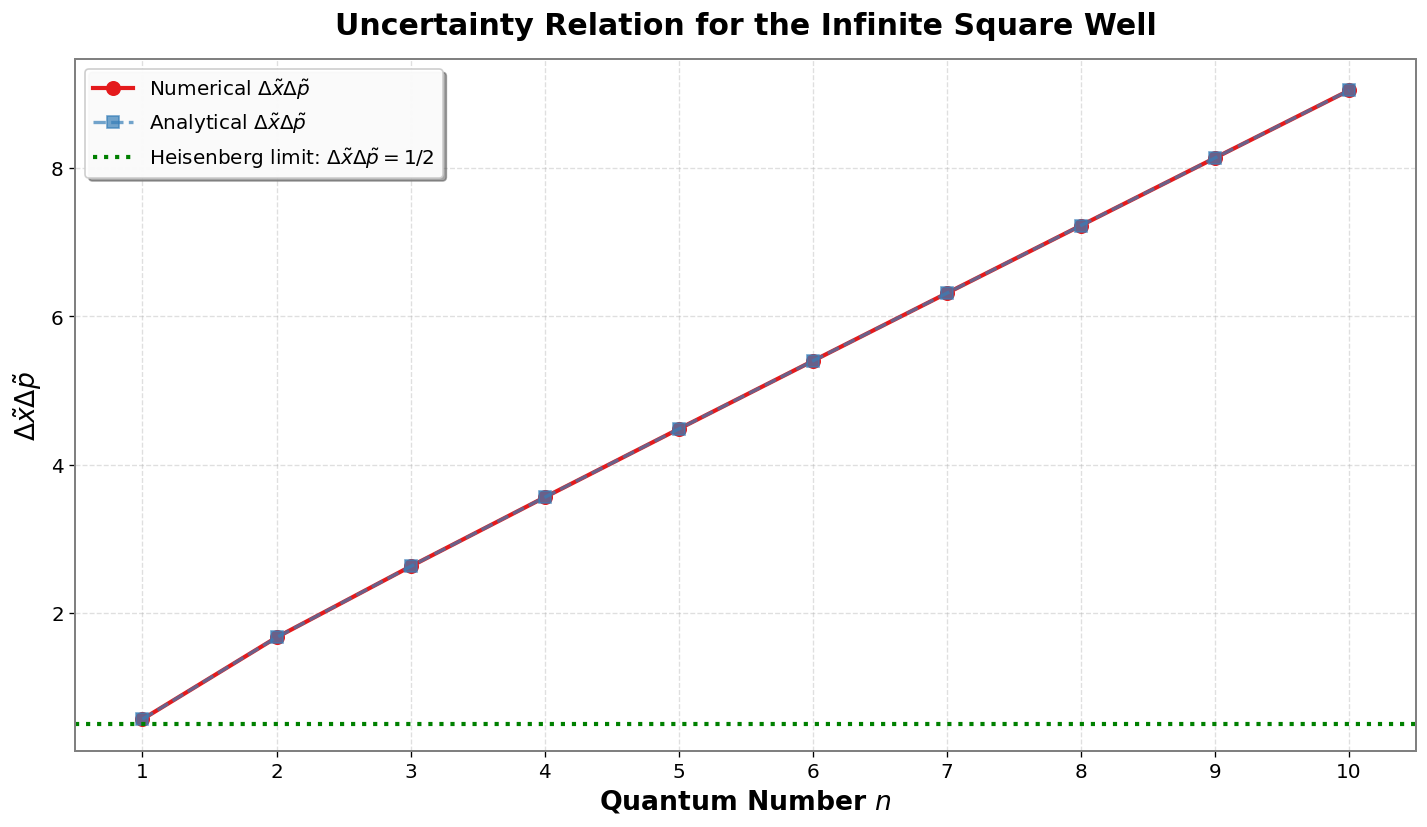


Summary: Uncertainty Relation Verification
n=1: Numerical Δx̃Δp̃ = 0.5678615744495454, Analytical = 0.5678618083866118, Satisfies ≥ 1/2? True
n=2: Numerical Δx̃Δp̃ = 1.6702870825164144, Analytical = 1.6702898352371223, Satisfies ≥ 1/2? True
n=3: Numerical Δx̃Δp̃ = 2.6271947229319714, Analytical = 2.6272044649811743, Satisfies ≥ 1/2? True
n=4: Numerical Δx̃Δp̃ = 3.5579917968214154, Analytical = 3.5580152521856636, Satisfies ≥ 1/2? True
n=5: Numerical Δx̃Δp̃ = 4.478980079365739, Analytical = 4.479026215105558, Satisfies ≥ 1/2? True
n=6: Numerical Δx̃Δp̃ = 5.395178374692669, Analytical = 5.395258400046107, Satisfies ≥ 1/2? True
n=7: Numerical Δx̃Δp̃ = 6.308666863990194, Analytical = 6.308794230103051, Satisfies ≥ 1/2? True
n=8: Numerical Δx̃Δp̃ = 7.220466782159428, Analytical = 7.220657181942877, Satisfies ≥ 1/2? True
n=9: Numerical Δx̃Δp̃ = 8.131138700815114, Analytical = 8.131410068822822, Satisfies ≥ 1/2? True
n=10: Numerical Δx̃Δp̃ = 9.041015840274833, Analytical = 9.041388352593385,

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Define parameters
N = 1000
l = 1.0 / (N - 1)
x = np.linspace(0, 1, N)

# Your computed energy eigenvalues
energy_values = eps_arr  # Your eigenvalues

# Define the potential
def V(x):
    return -1

potential = np.array([V(xi) for xi in x])

# Storage for uncertainty values
delta_x_list = []
delta_p_list = []
uncertainty_product = []

for n, energy in enumerate(energy_values, start=1):
    print(f"Computing uncertainty for n = {n}")
    
    # Solve the Schrödinger equation
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    
    # Normalize the wave function
    integral = simps(psi**2, dx=l)
    normalization_constant = 1.0 / np.sqrt(integral)
    psi_normalized = normalization_constant * psi
    
    # Ensure correct sign
    if psi_normalized[1] < 0:
        psi_normalized = -psi_normalized
    
    # --- Compute Δx̃ ---
    # For symmetric potentials (infinite square well), <x̃> = 0.5
    x_expectation = simps(x * psi_normalized**2, dx=l)
    x_squared_expectation = simps(x**2 * psi_normalized**2, dx=l)
    delta_x = np.sqrt(x_squared_expectation - x_expectation**2)
    
    # --- Compute Δp̃ ---
    # Method 1: Using finite difference for second derivative
    # Initialize second derivative array
    psi_double_prime = np.zeros(N)
    
    # Compute second derivative using 3-point formula (Eq. 12)
    # Skip boundaries (indices 0 and N-1) as they vanish
    for i in range(1, N-1):
        psi_double_prime[i] = (psi_normalized[i-1] - 2*psi_normalized[i] + psi_normalized[i+1]) / l**2
    
    # Compute <p̃²> using Eq. 11: -∫ ψ(d²ψ/dx²)dx
    p_squared_expectation = -simps(psi_normalized * psi_double_prime, dx=l)
    
    # For stationary states, <p̃> = 0, so Δp̃ = sqrt(<p̃²>)
    delta_p = np.sqrt(p_squared_expectation)
    
    # Store results
    delta_x_list.append(delta_x)
    delta_p_list.append(delta_p)
    uncertainty_product.append(delta_x * delta_p)
    
    print(f"  Δx̃ = {delta_x:.6f}, Δp̃ = {delta_p:.6f}, Δx̃Δp̃ = {delta_x * delta_p:.6f}")

# Convert to numpy arrays
delta_x_array = np.array(delta_x_list)
delta_p_array = np.array(delta_p_list)
uncertainty_array = np.array(uncertainty_product)
n_values = np.arange(1, len(energy_values) + 1)

# --- Analytical solution for comparison ---
# For infinite square well: Δx̃_analytical and Δp̃_analytical
# Δx̃ = sqrt(1/12 - 1/(2n²π²))
# Δp̃ = nπ
delta_x_analytical = np.sqrt(1/12 - 1/(2 * n_values**2 * np.pi**2))
delta_p_analytical = n_values * np.pi
uncertainty_analytical = delta_x_analytical * delta_p_analytical

# --- Plot the results ---
fig, ax = plt.subplots(figsize=(12, 7), dpi=120)

# Plot numerical uncertainty product
ax.plot(n_values, uncertainty_array, 
        'o-', color='#e41a1c', linewidth=2.5, markersize=8, 
        label='Numerical $\\Delta\\tilde{x}\\Delta\\tilde{p}$')

# Plot analytical uncertainty product
ax.plot(n_values, uncertainty_analytical, 
        's--', color='#377eb8', linewidth=2, markersize=7, alpha=0.7,
        label='Analytical $\\Delta\\tilde{x}\\Delta\\tilde{p}$')

# Plot Heisenberg limit (ℏ/2 → 1/2 in non-dimensional units)
ax.axhline(y=0.5, color='green', linestyle=':', linewidth=2.5, 
           label='Heisenberg limit: $\\Delta\\tilde{x}\\Delta\\tilde{p} = 1/2$')

# Title and labels
ax.set_title("Uncertainty Relation for the Infinite Square Well", 
             fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel("Quantum Number $n$", fontsize=16, fontweight='bold')
ax.set_ylabel(r"$\Delta\tilde{x}\Delta\tilde{p}$", fontsize=16, fontweight='bold')

# Set x-axis to integers
ax.set_xticks(n_values)
ax.set_xlim(0.5, len(n_values) + 0.5)

# Grid
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# Legend
ax.legend(loc='upper left', fontsize=12, framealpha=0.95, fancybox=True, shadow=True)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('gray')

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Uncertainty_Relation_for_the_Infinite_Square_Well.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary
print("\n" + "="*60)
print("Summary: Uncertainty Relation Verification")
print("="*60)
for i, n in enumerate(n_values):
    print(f"n={n}: Numerical Δx̃Δp̃ = {uncertainty_array[i]}, "
          f"Analytical = {uncertainty_analytical[i]}, "
          f"Satisfies ≥ 1/2? {uncertainty_array[i] >= 0.5}")
print("="*60)

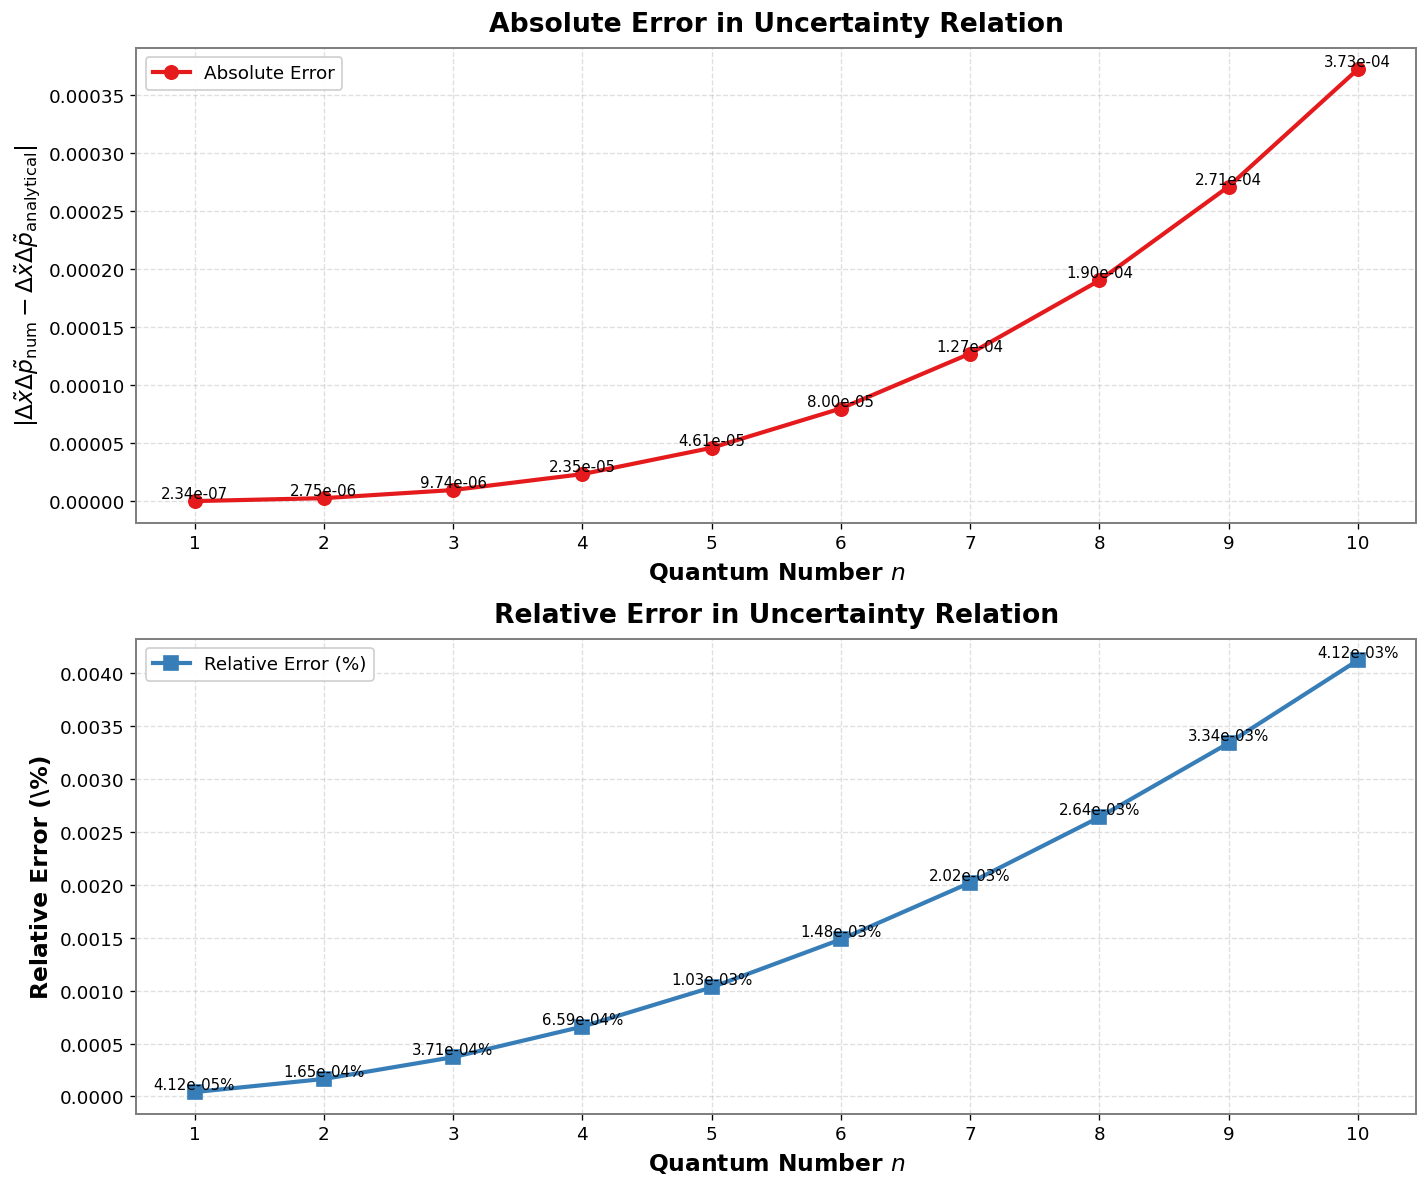


Error Analysis: Uncertainty Relation
n     Numerical       Analytical      Abs Error       Rel Error (%)  
----------------------------------------------------------------------
1     0.567862        0.567862        2.34e-07        0.000041       
2     1.670287        1.670290        2.75e-06        0.000165       
3     2.627195        2.627204        9.74e-06        0.000371       
4     3.557992        3.558015        2.35e-05        0.000659       
5     4.478980        4.479026        4.61e-05        0.001030       
6     5.395178        5.395258        8.00e-05        0.001483       
7     6.308667        6.308794        1.27e-04        0.002019       
8     7.220467        7.220657        1.90e-04        0.002637       
9     8.131139        8.131410        2.71e-04        0.003337       
10    9.041016        9.041388        3.73e-04        0.004120       
Maximum Absolute Error: 3.725123e-04
Maximum Relative Error: 0.004120%
Average Absolute Error: 1.123991e-04
Average Relat

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Compute analytical uncertainty values
n_values = np.arange(1, len(energy_values) + 1)
delta_x_analytical = np.sqrt(1/12 - 1/(2 * n_values**2 * np.pi**2))
delta_p_analytical = n_values * np.pi
uncertainty_analytical = delta_x_analytical * delta_p_analytical

# Calculate the error (absolute difference)
uncertainty_error = np.abs(uncertainty_array - uncertainty_analytical)

# Calculate relative error (percentage)
relative_error = (uncertainty_error / uncertainty_analytical) * 100

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), dpi=120)

# --- Subplot 1: Absolute Error ---
ax1.plot(n_values, uncertainty_error, 
         'o-', color='#e41a1c', linewidth=2.5, markersize=8,
         label='Absolute Error')
ax1.set_title("Absolute Error in Uncertainty Relation", 
              fontsize=16, fontweight='bold', pad=10)
ax1.set_xlabel("Quantum Number $n$", fontsize=14, fontweight='bold')
ax1.set_ylabel(r"$|\Delta\tilde{x}\Delta\tilde{p}_{\mathrm{num}} - \Delta\tilde{x}\Delta\tilde{p}_{\mathrm{analytical}}|$", 
               fontsize=14, fontweight='bold')
ax1.set_xticks(n_values)
ax1.grid(True, linestyle='--', alpha=0.4)
ax1.legend(fontsize=11, framealpha=0.95, fancybox=True)
ax1.tick_params(axis='both', which='major', labelsize=11)

# Add value labels on points
for i, (n, err) in enumerate(zip(n_values, uncertainty_error)):
    ax1.text(n, err, f'{err:.2e}', fontsize=9, ha='center', va='bottom')

# --- Subplot 2: Relative Error (Percentage) ---
ax2.plot(n_values, relative_error, 
         's-', color='#377eb8', linewidth=2.5, markersize=8,
         label='Relative Error (%)')
ax2.set_title("Relative Error in Uncertainty Relation", 
              fontsize=16, fontweight='bold', pad=10)
ax2.set_xlabel("Quantum Number $n$", fontsize=14, fontweight='bold')
ax2.set_ylabel(r"Relative Error (\%)", fontsize=14, fontweight='bold')
ax2.set_xticks(n_values)
ax2.grid(True, linestyle='--', alpha=0.4)
ax2.legend(fontsize=11, framealpha=0.95, fancybox=True)
ax2.tick_params(axis='both', which='major', labelsize=11)

# Add value labels on points
for i, (n, err) in enumerate(zip(n_values, relative_error)):
    ax2.text(n, err, f'{err:.2e}%', fontsize=9, ha='center', va='bottom')

# Spine styling for both subplots
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('gray')

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Absolute_Error_in_Uncertainty_Relation.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Print error summary
print("\n" + "="*70)
print("Error Analysis: Uncertainty Relation")
print("="*70)
print(f"{'n':<5} {'Numerical':<15} {'Analytical':<15} {'Abs Error':<15} {'Rel Error (%)':<15}")
print("-"*70)
for i, n in enumerate(n_values):
    print(f"{n:<5} {uncertainty_array[i]:<15.6f} {uncertainty_analytical[i]:<15.6f} "
          f"{uncertainty_error[i]:<15.2e} {relative_error[i]:<15.6f}")
print("="*70)
print(f"Maximum Absolute Error: {np.max(uncertainty_error):.6e}")
print(f"Maximum Relative Error: {np.max(relative_error):.6f}%")
print(f"Average Absolute Error: {np.mean(uncertainty_error):.6e}")
print(f"Average Relative Error: {np.mean(relative_error):.6f}%")
print("="*70)

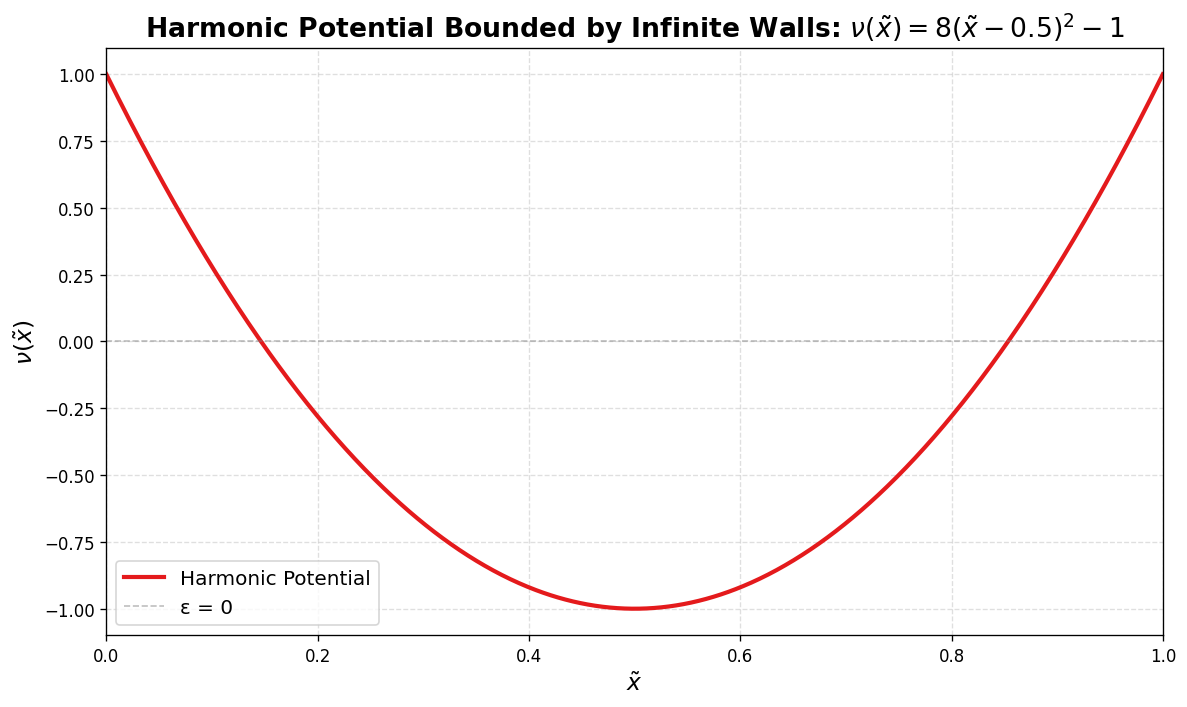


Finding energy eigenvalues for harmonic potential...
Found eigenvalue n=1: ε = -0.9105572700500488
Found eigenvalue n=2: ε = -0.7316718292236327
Found eigenvalue n=3: ε = -0.552786235809326
Found eigenvalue n=4: ε = -0.3738989639282223
Found eigenvalue n=5: ε = -0.19499761581420852
Found eigenvalue n=6: ε = -0.016009845733642124
Found eigenvalue n=7: ε = 0.16337726593017626
Found eigenvalue n=8: ε = 0.3441652488708502
Found eigenvalue n=9: ε = 0.5286915588378913
Found eigenvalue n=10: ε = 0.7208755111694344
Successfully found 10 eigenvalues

Computing wave functions and uncertainties...
Computing for n = 1, energy = -0.910557
  Δx̃ = 0.074768, Δp̃ = 6.687351, Δx̃Δp̃ = 0.499997
Computing for n = 2, energy = -0.731672
  Δx̃ = 0.129501, Δp̃ = 11.582820, Δx̃Δp̃ = 1.499986
Computing for n = 3, energy = -0.552786
  Δx̃ = 0.167184, Δp̃ = 14.953328, Δx̃Δp̃ = 2.499965
Computing for n = 4, energy = -0.373899
  Δx̃ = 0.197811, Δp̃ = 17.693402, Δx̃Δp̃ = 3.499941
Computing for n = 5, energy = -0.1

/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/2006742515.py:93: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(psi**2, dx=l)
/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/2006742515.py:101: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  x_expectation = simps(x * psi_normalized**2, dx=l)
/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/2006742515.py:102: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  x_squared_expectation = simps(x**2 * psi_normalized**2, dx=l)
/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/2006742515.py:114: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed

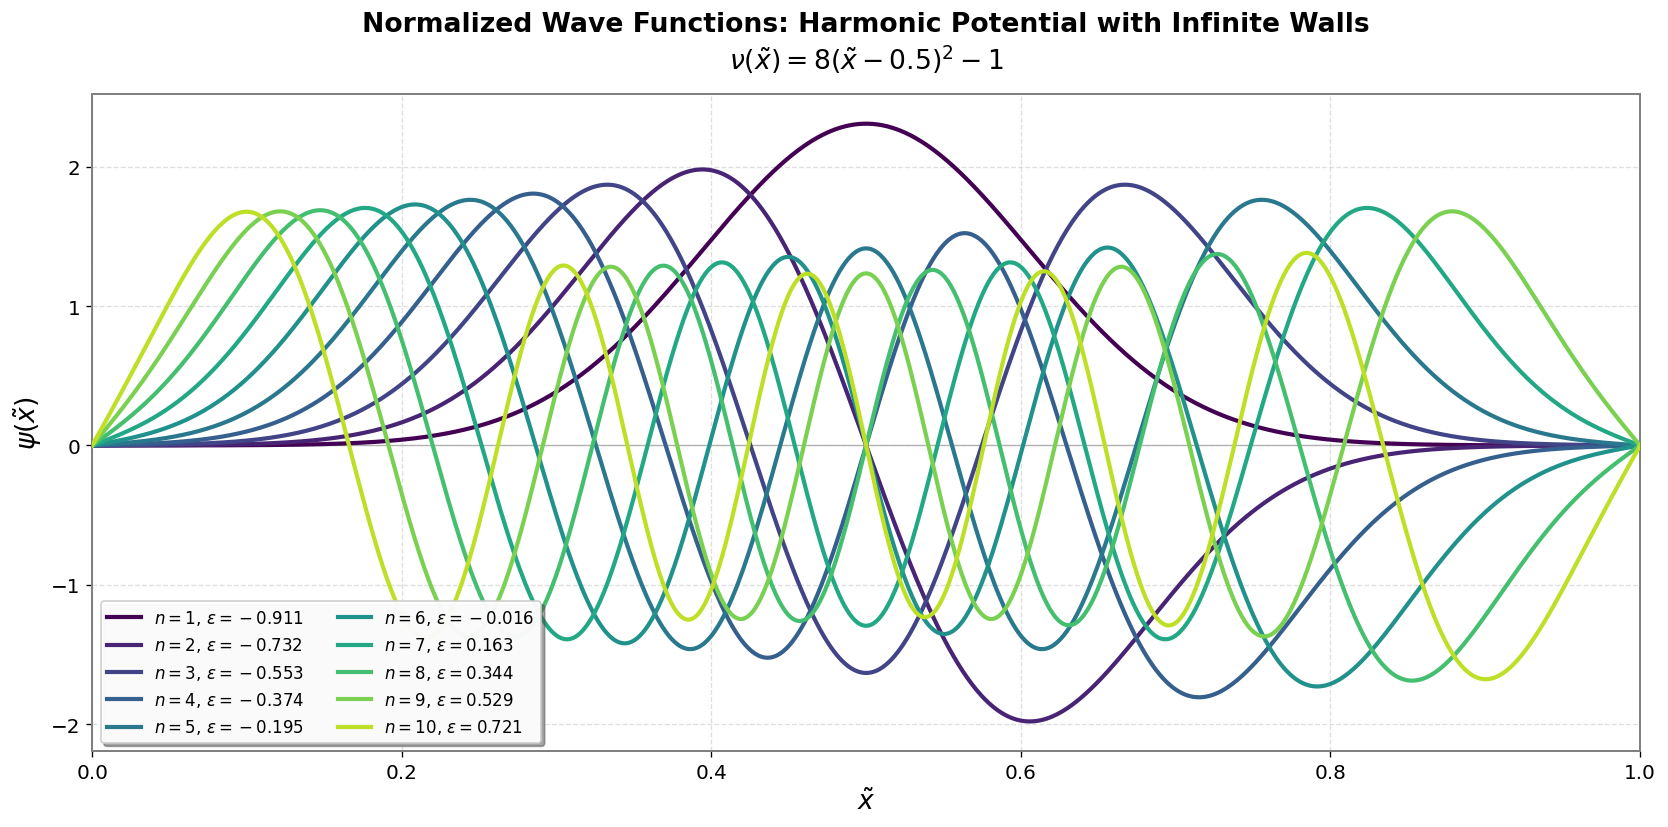

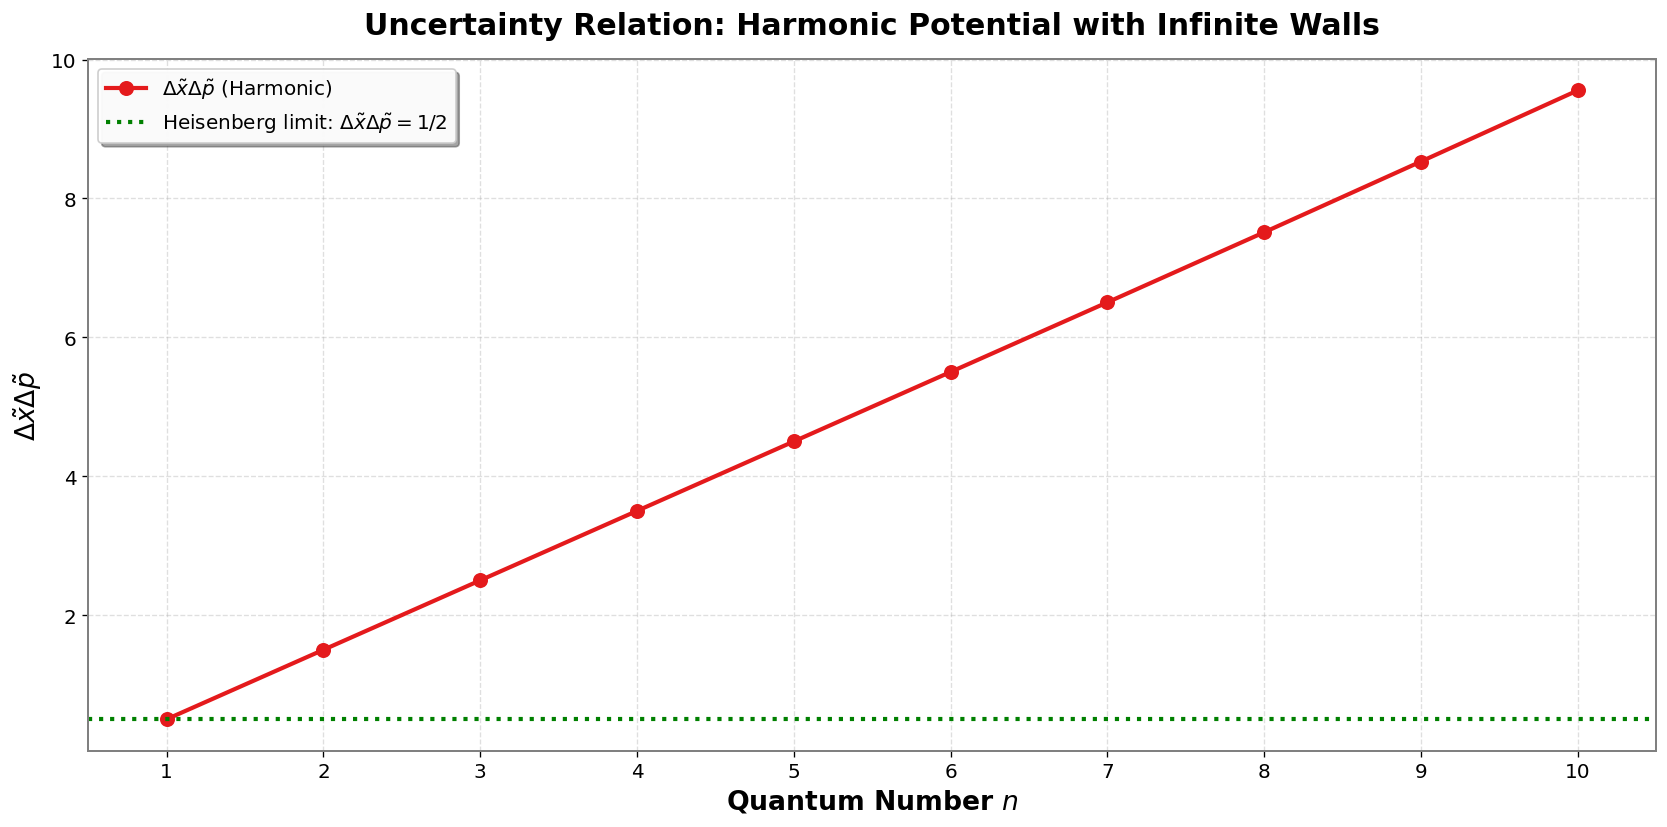


SUMMARY: Harmonic Potential with Infinite Walls
Potential: ν(x̃) = 8(x̃ - 0.5)² - 1
γ² = 1000
Number of grid points N = 1000
Grid spacing l = 0.001001
n     Energy ε        Δx̃          Δp̃          Δx̃Δp̃       ≥1/2?   
--------------------------------------------------------------------------------
1     -0.910557       0.074768     6.687351     0.499997     ✗       
2     -0.731672       0.129501     11.582820    1.499986     ✓       
3     -0.552786       0.167184     14.953328    2.499965     ✓       
4     -0.373899       0.197811     17.693402    3.499941     ✓       
5     -0.194998       0.224262     20.065759    4.499985     ✓       
6     -0.016010       0.247751     22.201688    5.500491     ✓       
7     0.163377        0.268619     24.209237    6.503050     ✓       
8     0.344165        0.286387     26.229131    7.511683     ✓       
9     0.528692        0.299950     28.440335    8.530691     ✓       
10    0.720876        0.308410     30.981254    9.554935     ✓     

/var/folders/1j/0q6grdh110z1c008s2nrczkm0000gn/T/ipykernel_76586/2006742515.py:253: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  center_of_mass = simps(x * psi**2, dx=l)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# =====================================================================
# PART 1: Setup for Harmonic Potential
# =====================================================================

# Updated parameters
gamma_squared = 1000  # Changed from 200 to 1000
N = 1000
l = 1.0 / (N - 1)
x = np.linspace(0, 1, N)

# Define the harmonic potential bounded by infinite walls
def V_harmonic(x):
    return 8 * (x - 0.5)**2 - 1

# Compute potential array
potential_harmonic = np.array([V_harmonic(xi) for xi in x])

# Plot the potential
fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
ax.plot(x, potential_harmonic, color='#e41a1c', linewidth=2.5, label='Harmonic Potential')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='ε = 0')
ax.set_title("Harmonic Potential Bounded by Infinite Walls: $\\nu(\\tilde{x}) = 8(\\tilde{x}-0.5)^2 - 1$", 
             fontsize=16, fontweight='bold')
ax.set_xlabel(r"$\tilde{x}$", fontsize=14, fontweight='bold')
ax.set_ylabel(r"$\nu(\tilde{x})$", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(fontsize=12)
ax.set_xlim(0, 1)
plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Harmonic_Potential_Bounded_by_Infinite_Walls.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# =====================================================================
# PART 2: Find Energy Eigenvalues Using Bisection Method
# =====================================================================

# Initialize
eps_arr = []
energy = -0.99  # Starting energy (must be above potential minimum)
acc = 1e-8  # Accuracy for bisection

print("\nFinding energy eigenvalues for harmonic potential...")
print("="*60)

while len(eps_arr) < 10:
    del_eps = 0.02
    psi_old = solve_schrodinger(energy, potential_harmonic, gamma_squared, N, l)[-1]
    energy += del_eps
    
    while abs(del_eps) > acc:
        energy += del_eps
        psi_new = solve_schrodinger(energy, potential_harmonic, gamma_squared, N, l)[-1]

        if psi_new * psi_old < 0:
            del_eps = -del_eps / 2

        psi_old = psi_new
    
    eps_arr.append(energy)
    print(f"Found eigenvalue n={len(eps_arr)}: ε = {energy}")

print("="*60)
print(f"Successfully found {len(eps_arr)} eigenvalues\n")

# Store eigenvalues
energy_values_harmonic = np.array(eps_arr)

# =====================================================================
# PART 3: Solve for Wave Functions and Compute Uncertainties
# =====================================================================

# Storage for results
psi_list = []
delta_x_list = []
delta_p_list = []
uncertainty_product = []

print("Computing wave functions and uncertainties...")
print("="*60)

for n, energy in enumerate(energy_values_harmonic, start=1):
    print(f"Computing for n = {n}, energy = {energy:.6f}")
    
    # Solve the Schrödinger equation
    psi = solve_schrodinger(energy, potential_harmonic, gamma_squared, N, l)
    
    # Normalize the wave function
    integral = simps(psi**2, dx=l)
    normalization_constant = 1.0 / np.sqrt(integral)
    psi_normalized = normalization_constant * psi
    
    # Store normalized wave function
    psi_list.append(psi_normalized)
    
    # --- Compute Δx̃ ---
    x_expectation = simps(x * psi_normalized**2, dx=l)
    x_squared_expectation = simps(x**2 * psi_normalized**2, dx=l)
    delta_x = np.sqrt(x_squared_expectation - x_expectation**2)
    
    # --- Compute Δp̃ ---
    # Initialize second derivative array
    psi_double_prime = np.zeros(N)
    
    # Compute second derivative using 3-point formula
    for i in range(1, N-1):
        psi_double_prime[i] = (psi_normalized[i-1] - 2*psi_normalized[i] + psi_normalized[i+1]) / l**2
    
    # Compute <p̃²>
    p_squared_expectation = -simps(psi_normalized * psi_double_prime, dx=l)
    delta_p = np.sqrt(p_squared_expectation)
    
    # Store results
    delta_x_list.append(delta_x)
    delta_p_list.append(delta_p)
    uncertainty_product.append(delta_x * delta_p)
    
    print(f"  Δx̃ = {delta_x:.6f}, Δp̃ = {delta_p:.6f}, Δx̃Δp̃ = {delta_x * delta_p:.6f}")

print("="*60 + "\n")

# Convert to arrays
delta_x_array = np.array(delta_x_list)
delta_p_array = np.array(delta_p_list)
uncertainty_array = np.array(uncertainty_product)
n_values = np.arange(1, len(energy_values_harmonic) + 1)

# =====================================================================
# PART 4: Plot Wave Functions
# =====================================================================

# Define colors
colors = plt.cm.viridis(np.linspace(0, 0.9, len(psi_list)))

fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

for i, (n, energy, psi_normalized) in enumerate(zip(n_values, energy_values_harmonic, psi_list)):
    # Plot wave function
    ax.plot(x, psi_normalized, 
            color=colors[i], 
            linewidth=2.5, 
            label=f"$n={n}$, $\\epsilon={energy:.3f}$",
            zorder=3)

# Title and labels
ax.set_title("Normalized Wave Functions: Harmonic Potential with Infinite Walls\n$\\nu(\\tilde{x}) = 8(\\tilde{x}-0.5)^2 - 1$", 
             fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel(r"$\tilde{x}$", fontsize=16, fontweight='bold')
ax.set_ylabel(r"$\psi(\tilde{x})$", fontsize=16, fontweight='bold')

# Axis settings
ax.set_xlim(0, 1)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3, zorder=1)
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.8, zorder=0)

# Legend
ax.legend(loc='lower left', fontsize=10, framealpha=0.95, 
          fancybox=True, shadow=True, ncol=2)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('gray')

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Normalized_Wave_Functions_Harmonic_Potential_with_Infinite_Walls.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# =====================================================================
# PART 5: Plot Uncertainty Relations
# =====================================================================

fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

# Plot uncertainty product
ax.plot(n_values, uncertainty_array, 
        'o-', color='#e41a1c', linewidth=2.5, markersize=8, 
        label='$\\Delta\\tilde{x}\\Delta\\tilde{p}$ (Harmonic)')

# Plot Heisenberg limit
ax.axhline(y=0.5, color='green', linestyle=':', linewidth=2.5, 
           label='Heisenberg limit: $\\Delta\\tilde{x}\\Delta\\tilde{p} = 1/2$')

# Title and labels
ax.set_title("Uncertainty Relation: Harmonic Potential with Infinite Walls", 
             fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel("Quantum Number $n$", fontsize=16, fontweight='bold')
ax.set_ylabel(r"$\Delta\tilde{x}\Delta\tilde{p}$", fontsize=16, fontweight='bold')

# Set x-axis
ax.set_xticks(n_values)
ax.set_xlim(0.5, len(n_values) + 0.5)

# Grid and legend
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
ax.legend(loc='upper left', fontsize=12, framealpha=0.95, fancybox=True, shadow=True)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('gray')

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Uncertainty_Relation_Harmonic_Potential_with_Infinite_Walls.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# =====================================================================
# PART 6: Summary Table
# =====================================================================

print("\n" + "="*80)
print("SUMMARY: Harmonic Potential with Infinite Walls")
print("="*80)
print(f"Potential: ν(x̃) = 8(x̃ - 0.5)² - 1")
print(f"γ² = {gamma_squared}")
print(f"Number of grid points N = {N}")
print(f"Grid spacing l = {l:.6f}")
print("="*80)
print(f"{'n':<5} {'Energy ε':<15} {'Δx̃':<12} {'Δp̃':<12} {'Δx̃Δp̃':<12} {'≥1/2?':<8}")
print("-"*80)
for i, n in enumerate(n_values):
    satisfies = "✓" if uncertainty_array[i] >= 0.5 else "✗"
    print(f"{n:<5} {energy_values_harmonic[i]:<15.6f} {delta_x_array[i]:<12.6f} "
          f"{delta_p_array[i]:<12.6f} {uncertainty_array[i]:<12.6f} {satisfies:<8}")
print("="*80)

# =====================================================================
# PART 7: Analysis of Higher Energy States
# =====================================================================

print("\nANALYSIS: Behavior at Higher Energies")
print("="*80)

# Analyze wave function distribution
for i in range(len(psi_list)):
    n = i + 1
    energy = energy_values_harmonic[i]
    psi = psi_list[i]
    
    # Calculate center of mass of |ψ|²
    center_of_mass = simps(x * psi**2, dx=l)
    
    # Check wave function amplitude near boundaries vs center
    edge_amplitude_left = np.max(np.abs(psi[:20]))
    edge_amplitude_right = np.max(np.abs(psi[-20:]))
    center_amplitude = np.max(np.abs(psi[N//2-30:N//2+30]))
    edge_ratio = max(edge_amplitude_left, edge_amplitude_right) / center_amplitude
    
    # Classify behavior
    if energy < -0.5:
        behavior = "Harmonic-like (confined to center)"
    elif energy < 0:
        behavior = "Transition (spreading outward)"
    else:
        behavior = "Box-like (approaching walls)"
    
    print(f"n={n:<2} | ε={energy} | Center of mass={center_of_mass:.4f} | "
          f"Edge/Center ratio={edge_ratio:.3f} | {behavior}")

print("\n" + "="*80)
print("OBSERVATIONS:")
print("-"*80)
print("• Low energy states (ε << 0): Wave functions concentrated near x̃=0.5")
print("  - Behave like harmonic oscillator eigenstates")
print("  - Minimal interaction with infinite walls")
print()
print("• Intermediate energy states (-0.5 < ε < 0): Transition regime")
print("  - Wave functions begin to spread toward boundaries")
print("  - Increasing edge amplitude")
print()
print("• High energy states (ε > 0): Approaching infinite square well behavior")
print("  - Wave functions extend throughout the well")
print("  - Significant amplitude near walls")
print("  - Energy levels become more evenly spaced (like particle in a box)")
print("="*80)

[-0.9105572618713378, -0.7316718210449217, -0.5527862467041011, -0.3738989748229975, -0.1949976076354974, -0.016009856628417328, 0.16337725503540107, 0.34416525704956136, 0.5286915670166025, 0.7208755193481455, 0.9254117666015635, 1.1463480077514663, 1.386243637634279, 1.6463014493713402, 1.9269141851196314, 2.228111351562503, 2.5497971235046424, 2.891850136352543, 3.254158238006596, 3.6366273008117727]
[-0.950651961730957, -0.8026079096069334, -0.5558677973022457, -0.2104316438903802, 0.23370055062866268, 0.7765288053283702, 1.418053082061769, 2.158273418975832, 2.9971897779235865, 3.9348021970520053, 4.9711106382140935, 6.106115120483356, 7.339815624786309, 8.672212170196437, 10.103304737640252, 11.633093308044273, 13.261577881408495, 14.988758457732924, 16.814634998870577, 18.73920752389495]
[0.17888544 0.17888557 0.17888727 0.17890137 0.17898775 0.17938711
 0.180788   0.18452631 0.19218395 0.20453625 0.22093624 0.23989563
 0.26005781 0.28061274 0.30119717 0.32168577 0.34205301 0.36

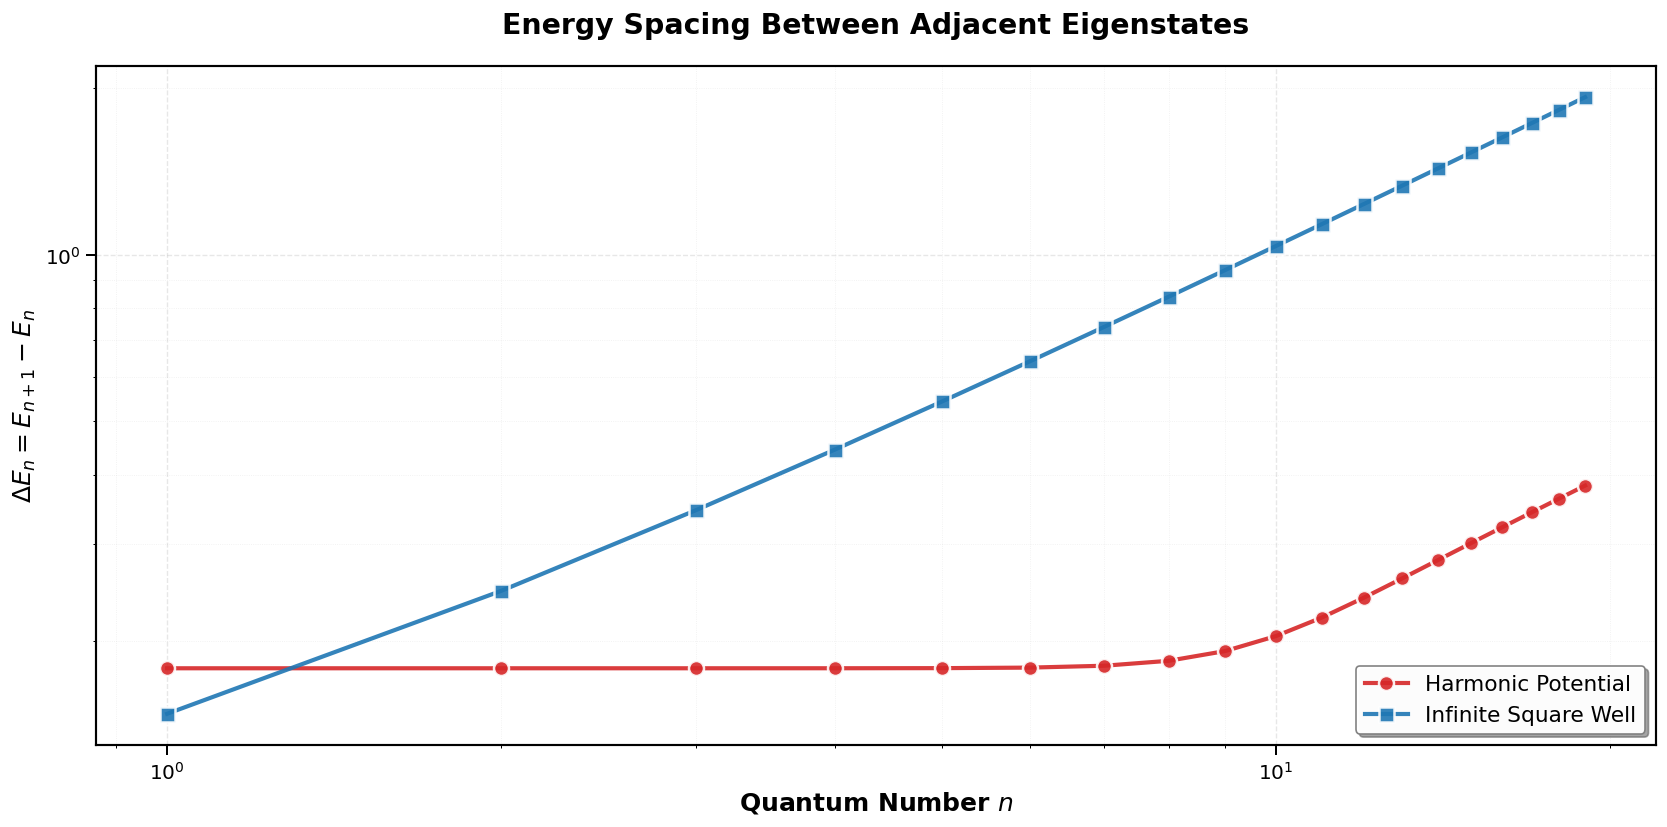

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# =====================================================================
# Find 20 eigenvalues for HARMONIC potential
# =====================================================================
eps_arr_harmonic = []
energy = -0.999999
acc = 1e-8

while len(eps_arr_harmonic) < 20:
    del_eps = 0.02
    psi_old = solve_schrodinger(energy, potential_harmonic, gamma_squared, N, l)[-1]
    energy += del_eps
    
    while abs(del_eps) > acc:
        energy += del_eps
        psi_new = solve_schrodinger(energy, potential_harmonic, gamma_squared, N, l)[-1]
        if psi_new * psi_old < 0:
            del_eps = -del_eps / 2
        psi_old = psi_new
    
    eps_arr_harmonic.append(energy)

print(eps_arr_harmonic)

# =====================================================================
# Find 20 eigenvalues for INFINITE SQUARE WELL
# =====================================================================
potential_square_well = np.full(N, -1.0)
gamma_squared = 200
eps_arr_square_well = []
energy = -0.999999

while len(eps_arr_square_well) < 20:
    del_eps = 0.02
    psi_old = solve_schrodinger(energy, potential_square_well, gamma_squared, N, l)[-1]
    energy += del_eps
    
    while abs(del_eps) > acc:
        energy += del_eps
        psi_new = solve_schrodinger(energy, potential_square_well, gamma_squared, N, l)[-1]
        if psi_new * psi_old < 0:
            del_eps = -del_eps / 2
        psi_old = psi_new
    
    eps_arr_square_well.append(energy)
print(eps_arr_square_well)
'''
acc = 1e-8 # Desired accuracy for energy eigenvalues

eps_0 = -0.999999

eps_arr = []

energy  = eps_0



while len(eps_arr) < 10:
    del_eps = 0.02
    psi_old = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]
    energy += del_eps
    while abs(del_eps)>acc:
        energy += del_eps
        psi_new = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]

        if psi_new * psi_old < 0:
            del_eps = -del_eps/2

        psi_old = psi_new

    
    
    eps_arr.append(energy)'''

# =====================================================================
# Compute energy differences and plot
# =====================================================================
energy_diff_harmonic = np.diff(eps_arr_harmonic)
print(energy_diff_harmonic)
energy_diff_square = np.diff(eps_arr_square_well)
print(energy_diff_square)
n_values = np.arange(1, len(energy_diff_harmonic) + 1)

fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

ax.loglog(n_values, energy_diff_harmonic, 
          'o-', color='#d62728', linewidth=2.5, markersize=9,
          markeredgewidth=1.5, markeredgecolor='white',
          label='Harmonic Potential', alpha=0.9)

ax.loglog(n_values, energy_diff_square, 
          's-', color='#1f77b4', linewidth=2.5, markersize=9,
          markeredgewidth=1.5, markeredgecolor='white',
          label='Infinite Square Well', alpha=0.9)

ax.set_title("Energy Spacing Between Adjacent Eigenstates", 
             fontsize=17, fontweight='bold', pad=20)
ax.set_xlabel("Quantum Number $n$", fontsize=15, fontweight='bold')
ax.set_ylabel(r"$\Delta E_n = E_{n+1} - E_n$", fontsize=15, fontweight='bold')
ax.grid(True, which='both', linestyle='--', alpha=0.3, linewidth=0.8)
ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)
ax.legend(fontsize=13, framealpha=0.98, loc='lower right', 
          edgecolor='gray', fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.2, length=6)

for spine in ax.spines.values():
    spine.set_linewidth(1.3)

plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Com_Lab_Solving_SE/plots/Energy_Spacing_Between_Adjacent_Eigenstates.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()